In [1]:
# Bibliotecas utilizadas
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Wine

In [2]:
# Carregando os dados em um dataframe
wine_df = pd.read_csv('data/wine.data',
                      names=['class','alcohol','malic acid','ash',
                             'alkalinity of ash','magnesium','total phenols',
                             'flavanoids','nonflavanoid phenols','proanthocyanins',
                             'color intensity','hue','OD','proline'])

wine_df.head(5)

,class,alcohol,malic acid,ash,alkalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
# classificando a variavel resposta
wine_df['class'] = wine_df['class'].astype('category')
wine_df = pd.get_dummies(wine_df, columns=['class'])

---

In [4]:
# Verificação de valores faltantes
wine_df.isnull().sum()

alcohol                 0
malic acid              0
ash                     0
alkalinity of ash       0
magnesium               0
total phenols           0
flavanoids              0
nonflavanoid phenols    0
proanthocyanins         0
color intensity         0
hue                     0
OD                      0
proline                 0
class_1                 0
class_2                 0
class_3                 0
dtype: int64

In [5]:
# Verificação de valores duplicados
# Retorna "True" caso haja pelo menos uma instância duplicada na base.
# Caso contrário, retorna "False"
any(wine_df.duplicated())

False

---

In [6]:
# Normalização dos dados
scaler = MinMaxScaler()
wine_norm = scaler.fit_transform(wine_df)
wine_norm = pd.DataFrame(wine_norm)
wine_norm.columns = wine_df.columns
wine_norm.head()

,alcohol,malic acid,ash,alkalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD,proline,class_1,class_2,class_3
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,1.0,0.0,0.0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,1.0,0.0,0.0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,1.0,0.0,0.0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,1.0,0.0,0.0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,1.0,0.0,0.0


In [7]:
# Separando as variavis explicativas da variavel resposta
wine_X = wine_norm.drop(columns=['class_1','class_2','class_3'])
wine_y = wine_norm[['class_1','class_2','class_3']]

In [8]:
wine_X.head(5)

,alcohol,malic acid,ash,alkalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD,proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


In [9]:
wine_y.head(5)

,class_1,class_2,class_3
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [10]:
wine_y.value_counts()

class_1  class_2  class_3
0.0      1.0      0.0        71
1.0      0.0      0.0        59
0.0      0.0      1.0        48
dtype: int64

In [11]:
wine_X, wine_y= np.array(wine_X), np.array(wine_y)

---

# Treino Wine

In [12]:
from src.mlp import MLP
from matplotlib import pyplot as plt

In [13]:
# Separação em dados para treino e teste
wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(wine_X, 
                                                                        wine_y,
                                                                        test_size=0.3,
                                                                        random_state=42)

wine_X_train.shape, wine_y_train.shape, wine_X_test.shape, wine_y_test.shape

((124, 13), (124, 3), (54, 13), (54, 3))

tx:0.10 alpha:0.1 MSE:0.07672
tx:0.10 alpha:0.5 MSE:0.06231
tx:0.10 alpha:1.0 MSE:0.05196
tx:0.50 alpha:0.1 MSE:0.03329
tx:0.50 alpha:0.5 MSE:0.03185
tx:0.50 alpha:1.0 MSE:0.03047
tx:0.99 alpha:0.1 MSE:0.02987
tx:0.99 alpha:0.5 MSE:0.02829
tx:0.99 alpha:1.0 MSE:0.02701


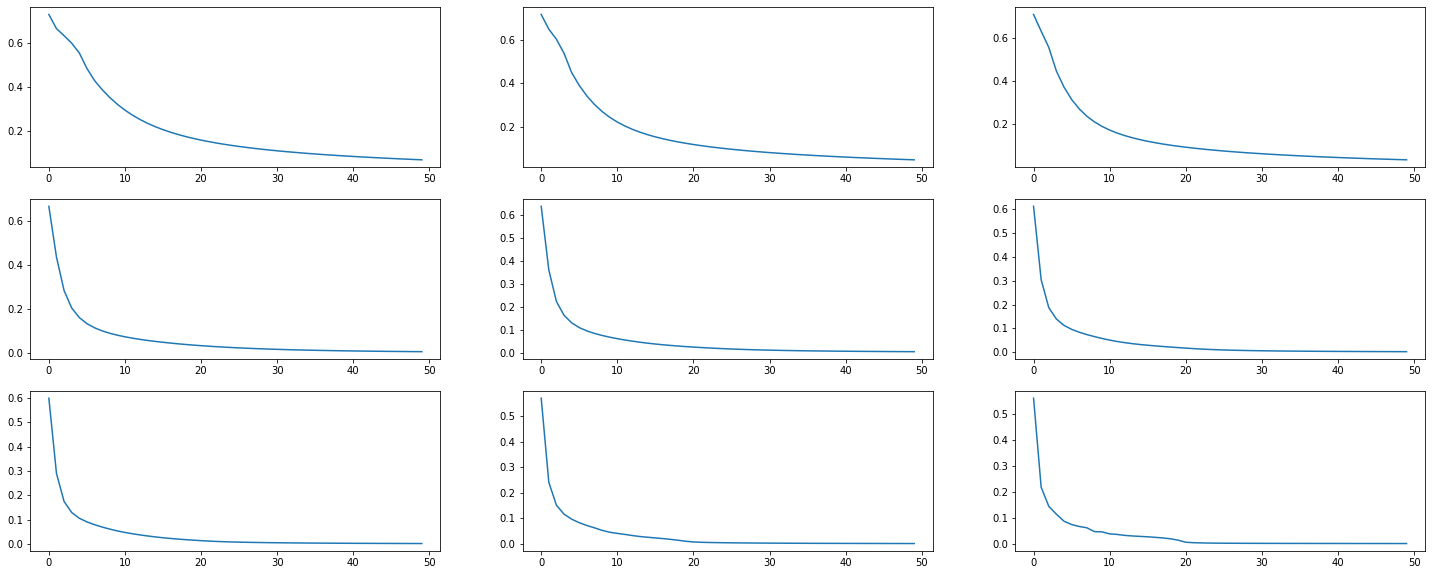

In [14]:
neta  = [0.1, 0.5, 0.99]
alpha = [0.1, 0.5, 0.99]

fig, axs = plt.subplots(len(neta), len(alpha))
fig.set_figheight(10)
fig.set_figwidth(25)

for i, neta_i in enumerate(neta):
    for j, alpha_i in enumerate(alpha):
        rede = MLP(camadas=[13,13,3],seed=123)
        err = rede.treino(X=wine_X_train, Y=wine_y_train, taxa=neta_i, alpha=alpha_i, max_epocas=50)
        MSE = rede.teste(X=wine_X_test, Y=wine_y_test)
        axs[i,j].plot(err)
        print('tx:{:.2f} alpha:{:.1f} MSE:{:.5f}'.format(neta_i, alpha_i, MSE))
plt.show()

tx:0.10 alpha:0.1 MSE:0.04791
tx:0.10 alpha:0.5 MSE:0.03879
tx:0.10 alpha:1.0 MSE:0.03315
tx:0.50 alpha:0.1 MSE:0.02420
tx:0.50 alpha:0.5 MSE:0.02357
tx:0.50 alpha:1.0 MSE:0.02446
tx:0.99 alpha:0.1 MSE:0.02297
tx:0.99 alpha:0.5 MSE:0.02329
tx:0.99 alpha:1.0 MSE:0.02773


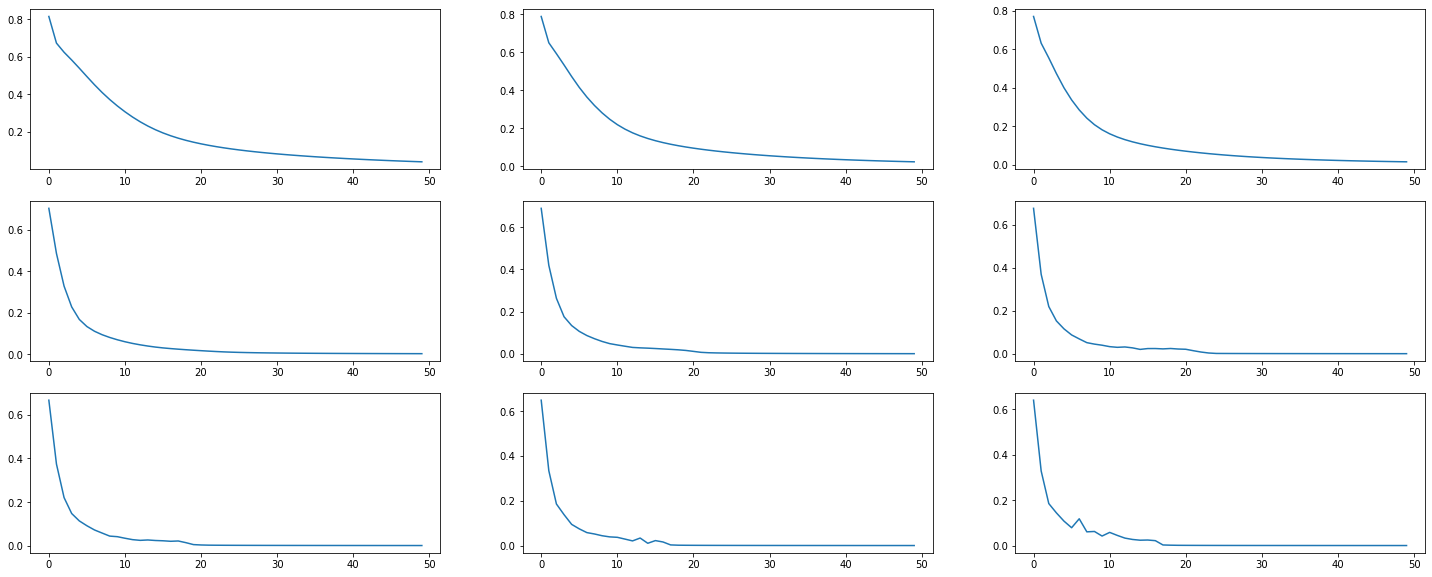

In [15]:
fig, axs = plt.subplots(len(neta), len(alpha))
fig.set_figheight(10)
fig.set_figwidth(25)

for i, neta_i in enumerate(neta):
    for j, alpha_i in enumerate(alpha):
        rede = MLP(camadas=[13,13,13,3],seed=123)
        err = rede.treino(X=wine_X_train, Y=wine_y_train, taxa=neta_i, alpha=alpha_i, max_epocas=50)
        MSE = rede.teste(X=wine_X_test, Y=wine_y_test)
        axs[i,j].plot(err)
        print('tx:{:.2f} alpha:{:.1f} MSE:{:.5f}'.format(neta_i, alpha_i, MSE))
plt.show()

In [16]:
# debug
rede = MLP(camadas=[13,4,3])
_ = rede.treino(X=wine_X_train, Y=wine_y_train, taxa=0.5, alpha=0.5, max_epocas=100)

debug = np.random.randint(size=20,low=0, high=len(wine_df))
for v in debug:
    debug_x = [np.array(wine_norm.iloc[v,:-3])]
    debug_y = [np.array(wine_norm.iloc[v,-3:])]
    
    saida, _ = rede.feedforward(debug_x)
    print(debug_y, saida)


[array([1., 0., 0.])] [[0.99401094 0.00433789 0.00727038]]
[array([1., 0., 0.])] [[0.99538316 0.00459744 0.00525798]]
[array([0., 1., 0.])] [[2.03700517e-02 9.85970076e-01 8.66831127e-04]]
[array([1., 0., 0.])] [[0.99045724 0.0042966  0.01222498]]
[array([1., 0., 0.])] [[0.96678109 0.04045688 0.00326023]]
[array([1., 0., 0.])] [[0.94032019 0.03371065 0.00968217]]
[array([0., 0., 1.])] [[0.00667735 0.00288321 0.99759213]]
[array([1., 0., 0.])] [[0.99538316 0.00459744 0.00525798]]
[array([1., 0., 0.])] [[0.9954412  0.00406513 0.00582444]]
[array([0., 0., 1.])] [[0.00849407 0.00122425 0.99883638]]
[array([0., 1., 0.])] [[0.01626694 0.98181138 0.00207535]]
[array([0., 0., 1.])] [[0.05235563 0.00388877 0.97434098]]
[array([0., 0., 1.])] [[0.02529777 0.00377264 0.98712368]]
[array([0., 0., 1.])] [[3.06920354e-02 6.70710072e-04 9.97299122e-01]]
[array([1., 0., 0.])] [[0.9928164  0.0040763  0.00898521]]
[array([1., 0., 0.])] [[0.99023291 0.01394395 0.00329044]]
[array([0., 1., 0.])] [[0.001254

---
# Music
As 68 primeiras colunas se referem a recursos de áudio da música, e as duas últimas se referem ao local de origem da música, representado pela latitude e longitude, respectivamente.

In [37]:
# Carregando os dados em um dataframe
music_df = pd.read_csv('data/default_features_1059_tracks.txt',
                       header=None)

music_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,...,-1.504263,0.351267,-1.018726,-0.174878,-1.089543,-0.668840,-0.914772,-0.836250,-15.75,-47.95
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,...,-0.495712,-0.465077,-0.157861,-0.157189,0.380951,1.088478,-0.123595,1.391141,14.91,-23.51
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,...,-0.637167,0.147260,0.217914,2.718442,0.972919,2.081069,1.375763,1.063847,12.65,-8.00
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,...,-0.178325,-0.065059,-0.724247,-1.020687,-0.751380,-0.385005,-0.012326,-0.392197,9.03,38.74
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,...,-0.919463,-0.667912,-0.820172,-0.190488,0.306974,0.119658,0.271838,1.289783,34.03,-6.85


---

In [18]:
# Verificação de valores faltantes
print(music_df.isnull().sum())

print(set(music_df.isnull().sum()))

0     0
1     0
2     0
3     0
4     0
     ..
65    0
66    0
67    0
68    0
69    0
Length: 70, dtype: int64
{0}


In [19]:
# Verificação de valores duplicados
# Retorna "True" caso haja pelo menos uma instância duplicada na base.
# Caso contrário, retorna "False"
any(music_df.duplicated())

False

---

In [38]:
music_scaler = MinMaxScaler()
music_norm = music_scaler.fit_transform(music_df)
music_norm = pd.DataFrame(music_norm)
music_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,0.792304,0.763528,0.554789,0.459774,0.332975,0.312870,0.694223,0.485061,0.772537,0.621409,...,0.010367,0.279176,0.059900,0.180836,0.046037,0.075438,0.046425,0.067519,0.217271,0.171557
1,0.160018,0.113349,0.072690,0.406624,0.751846,0.641129,0.601004,0.522885,0.619012,0.653455,...,0.122493,0.161148,0.146472,0.183240,0.260799,0.304061,0.166138,0.372358,0.558013,0.274298
2,0.076301,0.078613,0.047402,0.484945,0.437505,0.722346,0.670107,0.545760,0.474494,0.498113,...,0.106767,0.249681,0.184261,0.573916,0.347254,0.433194,0.393006,0.327565,0.532896,0.339499
3,0.072377,0.064981,0.437753,0.430514,0.595593,0.712046,0.825708,0.641975,0.647266,0.667595,...,0.157779,0.218983,0.089514,0.065927,0.095425,0.112365,0.182974,0.128292,0.492665,0.535985
4,0.191425,0.143468,0.117185,0.361344,0.782781,0.481490,0.574164,0.580605,0.477661,0.773414,...,0.075383,0.131821,0.079867,0.178716,0.249995,0.178020,0.225971,0.358486,0.770505,0.344333


In [21]:
# Separando os atributos
music_X = music_norm.drop(columns=[[68,69]])
music_y = music_norm[[68,69]]

In [22]:
music_X.head(5)

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,0.792304,0.763528,0.554789,0.459774,0.332975,0.312870,0.694223,0.485061,0.772537,0.621409,...,0.080394,0.252689,0.010367,0.279176,0.059900,0.180836,0.046037,0.075438,0.046425,0.067519
1,0.160018,0.113349,0.072690,0.406624,0.751846,0.641129,0.601004,0.522885,0.619012,0.653455,...,0.213051,0.111763,0.122493,0.161148,0.146472,0.183240,0.260799,0.304061,0.166138,0.372358
2,0.076301,0.078613,0.047402,0.484945,0.437505,0.722346,0.670107,0.545760,0.474494,0.498113,...,0.102961,0.172823,0.106767,0.249681,0.184261,0.573916,0.347254,0.433194,0.393006,0.327565
3,0.072377,0.064981,0.437753,0.430514,0.595593,0.712046,0.825708,0.641975,0.647266,0.667595,...,0.101781,0.285450,0.157779,0.218983,0.089514,0.065927,0.095425,0.112365,0.182974,0.128292
4,0.191425,0.143468,0.117185,0.361344,0.782781,0.481490,0.574164,0.580605,0.477661,0.773414,...,0.198040,0.181444,0.075383,0.131821,0.079867,0.178716,0.249995,0.178020,0.225971,0.358486


In [23]:
music_y.head(5)

,68,69
0,0.217271,0.171557
1,0.558013,0.274298
2,0.532896,0.339499
3,0.492665,0.535985
4,0.770505,0.344333


---

In [24]:
music_X, music_y = np.array(music_X), np.array(music_y)

In [25]:
# Separação em dados para treino e teste
music_X_train, music_X_test, music_y_train, music_y_test = train_test_split(music_X, 
                                                                            music_y,
                                                                            test_size=0.3,
                                                                            random_state=42)

In [26]:
music_X_train.shape, music_y_train.shape, music_X_test.shape, music_y_test.shape

((741, 68), (741, 2), (318, 68), (318, 2))

---

tx:0.10 alpha:0.1 MSE(treino):0.07475 MSE(teste):0.07331
tx:0.10 alpha:0.5 MSE(treino):0.07337 MSE(teste):0.07171
tx:0.10 alpha:1.0 MSE(treino):0.07243 MSE(teste):0.07067
tx:0.50 alpha:0.1 MSE(treino):0.06840 MSE(teste):0.07105
tx:0.50 alpha:0.5 MSE(treino):0.06797 MSE(teste):0.06982
tx:0.50 alpha:1.0 MSE(treino):0.06395 MSE(teste):0.06614
tx:0.99 alpha:0.1 MSE(treino):0.06211 MSE(teste):0.06741
tx:0.99 alpha:0.5 MSE(treino):0.06026 MSE(teste):0.06841
tx:0.99 alpha:1.0 MSE(treino):0.05944 MSE(teste):0.06850


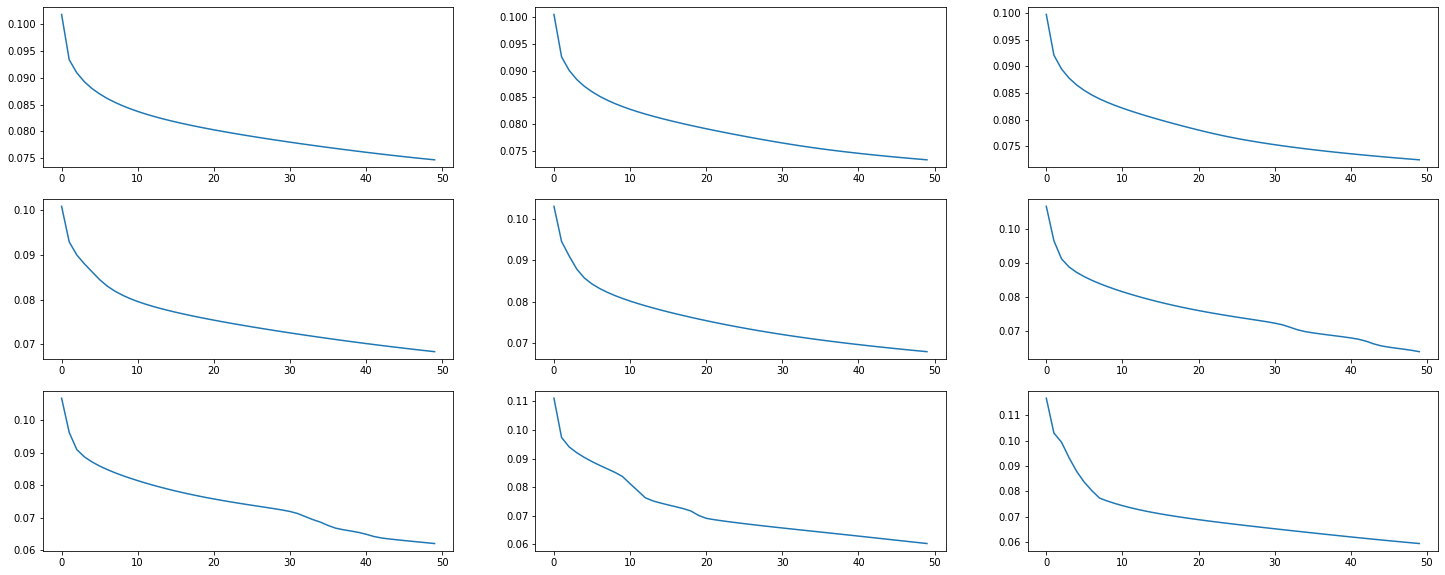

In [30]:
neta  = [0.1, 0.5, 0.99]
alpha = [0.1, 0.5, 0.99]

fig, axs = plt.subplots(len(neta), len(alpha))
fig.set_figheight(10)
fig.set_figwidth(25)

for i, neta_i in enumerate(neta):
    for j, alpha_i in enumerate(alpha):
        rede = MLP(camadas=[68,10,2],seed=123)
        err = rede.treino(X=music_X_train, Y=music_y_train, taxa=neta_i, alpha=alpha_i, max_epocas=50)
        MSE = rede.teste(X=music_X_test, Y=music_y_test)
        axs[i,j].plot(err)
        print('tx:{:.2f} alpha:{:.1f} MSE(treino):{:.5f} MSE(teste):{:.5f}'.format(neta_i, alpha_i, err[-1], MSE))
plt.show()

tx:0.10 alpha:0.0 MSE(treino):0.07576 MSE(teste):0.07501
tx:0.10 alpha:0.5 MSE(treino):0.07313 MSE(teste):0.07243
tx:0.10 alpha:1.0 MSE(treino):0.07145 MSE(teste):0.07072
tx:0.50 alpha:0.0 MSE(treino):0.06652 MSE(teste):0.06982
tx:0.50 alpha:0.5 MSE(treino):0.06439 MSE(teste):0.06846
tx:0.50 alpha:1.0 MSE(treino):0.06274 MSE(teste):0.06729
tx:0.99 alpha:0.0 MSE(treino):0.06271 MSE(teste):0.06880
tx:0.99 alpha:0.5 MSE(treino):0.05872 MSE(teste):0.06720
tx:0.99 alpha:1.0 MSE(treino):0.05782 MSE(teste):0.06707


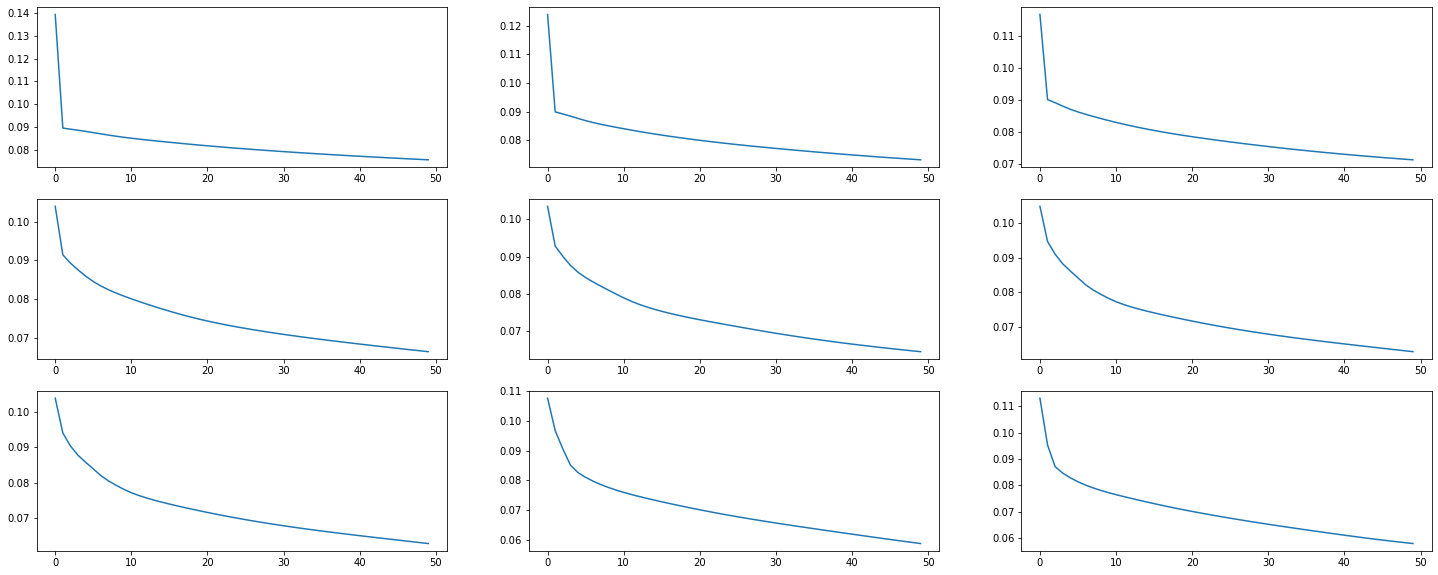

In [39]:
neta  = [0.1, 0.5, 0.99]
alpha = [0.0, 0.5, 0.99]

fig, axs = plt.subplots(len(neta), len(alpha))
fig.set_figheight(10)
fig.set_figwidth(25)

for i, neta_i in enumerate(neta):
    for j, alpha_i in enumerate(alpha):
        rede = MLP(camadas=[68,10,10,2],seed=123)
        err = rede.treino(X=music_X_train, Y=music_y_train, taxa=neta_i, alpha=alpha_i, max_epocas=50)
        MSE = rede.teste(X=music_X_test, Y=music_y_test)
        print('tx:{:.2f} alpha:{:.1f} MSE(treino):{:.5f} MSE(teste):{:.5f}'.format(neta_i, alpha_i, err[-1], MSE))
        axs[i,j].plot(err)
plt.show()

In [33]:
music_norm

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,0.792304,0.763528,0.554789,0.459774,0.332975,0.312870,0.694223,0.485061,0.772537,0.621409,...,0.010367,0.279176,0.059900,0.180836,0.046037,0.075438,0.046425,0.067519,0.217271,0.171557
1,0.160018,0.113349,0.072690,0.406624,0.751846,0.641129,0.601004,0.522885,0.619012,0.653455,...,0.122493,0.161148,0.146472,0.183240,0.260799,0.304061,0.166138,0.372358,0.558013,0.274298
2,0.076301,0.078613,0.047402,0.484945,0.437505,0.722346,0.670107,0.545760,0.474494,0.498113,...,0.106767,0.249681,0.184261,0.573916,0.347254,0.433194,0.393006,0.327565,0.532896,0.339499
3,0.072377,0.064981,0.437753,0.430514,0.595593,0.712046,0.825708,0.641975,0.647266,0.667595,...,0.157779,0.218983,0.089514,0.065927,0.095425,0.112365,0.182974,0.128292,0.492665,0.535985
4,0.191425,0.143468,0.117185,0.361344,0.782781,0.481490,0.574164,0.580605,0.477661,0.773414,...,0.075383,0.131821,0.079867,0.178716,0.249995,0.178020,0.225971,0.358486,0.770505,0.344333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,0.175863,0.146555,0.150084,0.340031,0.651354,0.471280,0.628473,0.588422,0.661773,0.624483,...,0.115489,0.372812,0.151603,0.411955,0.299522,0.483439,0.467440,0.417270,0.323739,0.523373
1055,0.288983,0.228174,0.181912,0.153649,0.366088,0.308070,0.344544,0.639537,0.417304,0.746966,...,0.202413,0.223701,0.185153,0.229335,0.280737,0.309041,0.520848,0.787248,0.520671,0.814150
1056,0.069022,0.066085,0.040218,0.261278,0.646547,0.759786,0.646515,0.655563,0.574265,0.655886,...,0.227549,0.088829,0.103011,0.095325,0.211613,0.069020,0.036005,0.103434,0.851634,0.456365
1057,0.048546,0.030926,0.637582,0.296680,0.403015,0.627610,0.622036,0.659792,0.527617,0.710961,...,0.393441,0.484197,0.236625,0.373109,0.125420,0.144568,0.066661,0.068078,1.000000,0.479527


In [34]:
# debug
rede = MLP(camadas=[68,10,10,2])
_ = rede.treino(X=music_X_train, Y=music_y_train, taxa=0.5, alpha=0.5, max_epocas=100)

debug = np.random.randint(size=20,low=0, high=len(music_df))
for v in debug:
    debug_x = [np.array(music_norm.iloc[v,:-2])]
    debug_y = [np.array(music_norm.iloc[v,-2:])]
    
    saida, _ = rede.feedforward(debug_x)
    print(debug_y, saida)

[array([0.72605023, 0.50432991])] [[0.81369456 0.61856325]]
[array([0.58401867, 0.        ])] [[0.50920343 0.23659347]]
[array([0.61180262, 0.77711451])] [[0.6449903  0.61397345]]
[array([0.97577239, 0.37262485])] [[0.93209691 0.33070069]]
[array([0.5328962 , 0.33949891])] [[0.64277205 0.64601425]]
[array([0.97577239, 0.37262485])] [[0.89695728 0.34629043]]
[array([0.77050456, 0.34433328])] [[0.69919102 0.60424402]]
[array([0.55801289, 0.27429797])] [[0.73301631 0.53248498]]
[array([0.71026895, 0.69766269])] [[0.65518147 0.52279649]]
[array([0.49266504, 0.53598453])] [[0.82301291 0.50296997]]
[array([0.59213158, 0.05027745])] [[0.49492988 0.20630611]]
[array([0.65636808, 0.88178914])] [[0.86576644 0.7328589 ]]
[array([0.83585241, 0.51114007])] [[0.64874928 0.3845708 ]]
[array([0.86863747, 0.68673281])] [[0.78476526 0.53409456]]
[array([0.83585241, 0.86236758])] [[0.68242774 0.63258823]]
[array([0.54512114, 0.79552716])] [[0.72758803 0.72756823]]
[array([0.80017782, 0.38662351])] [[0.49